### Q 1: Take any data from the internet and form a supervised machine learning problem around it. 

Dataset: Airtel Stock Market Prices

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("BHARTIARTL.NS.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4471 entries, 0 to 4470
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4471 non-null   datetime64[ns]
 1   Open       4429 non-null   float64       
 2   High       4429 non-null   float64       
 3   Low        4429 non-null   float64       
 4   Close      4429 non-null   float64       
 5   Adj Close  4429 non-null   float64       
 6   Volume     4429 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 244.6 KB


In [3]:
input_data = df[["Date", "Close"]]
input_data = input_data.set_index(['Date'])
input_data

,Close
Date,
2002-07-01,15.976300
2002-07-02,16.297701
2002-07-03,16.136999
2002-07-04,16.527201
2002-07-05,15.700800
...,...
2020-06-11,551.849976
2020-06-12,560.099976
2020-06-15,550.700012


In [4]:
series = pd.DataFrame(input_data['Close'].values)
dataframe = pd.concat([series.shift(1), series], axis = 1)
dataframe.columns = ['t', 't+1']
dataframe.head()

,t,t+1
0,NaN,15.976300
1,15.976300,16.297701
2,16.297701,16.136999
3,16.136999,16.527201
4,16.527201,15.700800


### Q 2: What is the difference between a dataframe and a series? What are the different types of datatypes present in Pandas?

### Ans. 
Series is a one-dimensional labeled array capable of holding any data type. Series is a one-dimensional object that can hold any data type such as integers, floats, and strings.
DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. DataFrames is two-dimensional object that can hold series, list, and dictionary.

The Series is the data structure for a single column of a DataFrame, not only conceptually, but literally, i.e. the data in a DataFrame is actually stored in memory as a collection of Series. They both have extremely similar APIs, but you'll find that DataFrame methods always cater to the possibility that you have more than one column. And, of course, you can always add another Series (or equivalent object) to a DataFrame, while adding a Series to another Series involves creating a DataFrame.

The various datatypes that are present in pandas are:
    object, 
    int64, 
    float64, 
    datetime64, 
    bool, 
    timedelta[ns], and
    category.

### Q 3: Explain all the metrics which I have written codes about. For example, explain what did you infer from the code df.describe()

### Ans.

#### df.shape()
The above metric is used to infer the shape of our dataframe, i.e. the number of rows and columns present in it. This inference is usually utilized into checking the dimensionality of our data and to decide an ideal split for training & validation.

#### df.info()
This metric is utilized to determin the type of data structure that our data is stored in. For example, Array, Series, DataFrame, etc. It also provides us with the *count*, *null status*, and *dtype* of data stored in each column of our datastructure as well as the number of entries (rows) present in them.

#### df.describe()
This metric is used to obtain descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values. *df.describe()* is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.

### Q 5: Read about the functions used in the code and write about it 

### Ans.

#### pd.read_csv():
Read a comma-separated values (csv) file into DataFrame.
Also supports optionally iterating or breaking of the file into chunks.

#### pd.to_datetime():
When a csv file is imported and a Data Frame is made, the Date time objects in the file are read as a string object rather a Date Time object and Hence it’s very tough to perform operations like Time difference on a string rather a Date Time object. Pandas to_datetime() method helps to convert string Date time into Python Date time object.

#### pd.DataFrame.set_index():
Pandas set_index() is a method to set a List, Series or Data frame as index of a Data Frame. Index column can be set while making a data frame too. But sometimes a data frame is made out of two or more data frames and hence later index can be changed using this method.

#### pd.DataFrame.head():
The head() function is used to get the first n rows. This function returns the first n rows for the object based on position. It is useful for quickly testing if your object has the right type of data in it.

#### pd.concat():
Pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects. The concat function does all of the heavy lifting of performing concatenation operations along an axis.

#### pandas.DataFrame.hist():
Make a histogram of the DataFrame’s.
A histogram is a representation of the distribution of data. This function calls matplotlib.pyplot.hist(), on each series in the DataFrame, resulting in one histogram per column.

### Q 6: Analyze the mean temperature data which will be attached with the files on Github

In [5]:
data=pd.read_csv("testset.csv")
data.head()

,datetime,Temperature
0,19961101-11:00,30.0
1,19961101-12:00,28.0
2,19961101-13:00,24.0
3,19961101-14:00,24.0
4,19961101-16:00,23.0


In [6]:
data['datetime'] = pd.to_datetime(data['datetime'].apply(lambda x: pd.datetime.strptime(x,"%Y%m%d-%H:%M").strftime("%Y-%m-%d %H:%M")))
data['datetime'].head()

C:\Users\Yash Srivastava\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


0   1996-11-01 11:00:00
1   1996-11-01 12:00:00
2   1996-11-01 13:00:00
3   1996-11-01 14:00:00
4   1996-11-01 16:00:00
Name: datetime, dtype: datetime64[ns]

In [7]:
data = data.set_index('datetime',drop=True)
data.index.name = 'datetime'

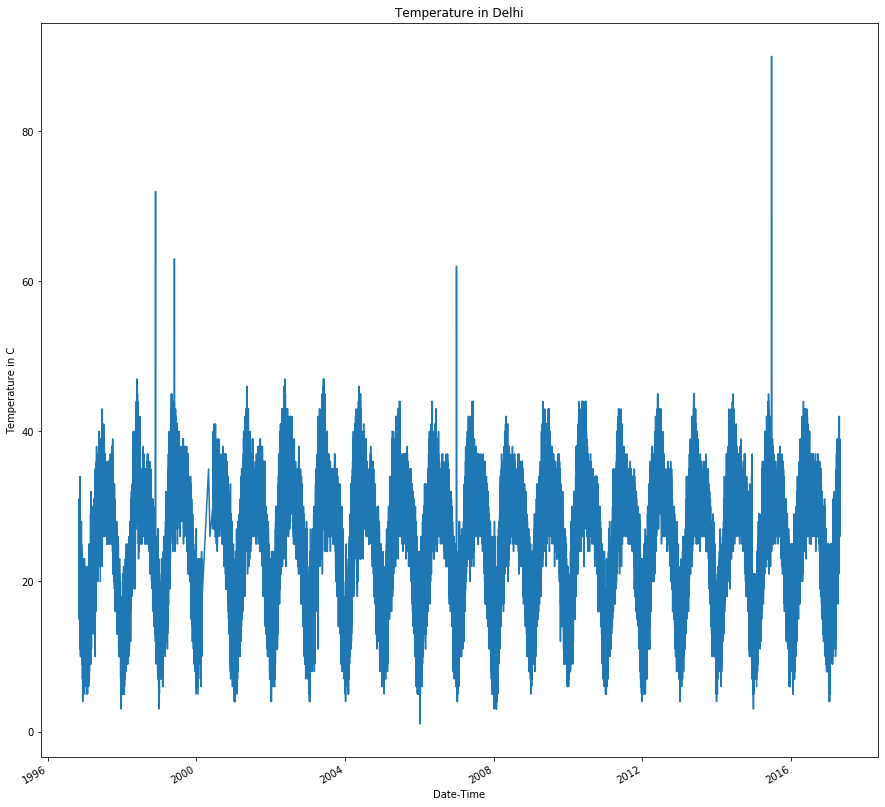

In [8]:
fig, ax = plt.subplots()
data['Temperature'].plot(figsize=(15,15),ax=ax)
ax.set_xlabel('Date-Time')
ax.set_ylabel('Temperature in C')
ax.set_title('Temperature in Delhi')
plt.show()

In [9]:
data = data['2001':]

newdata = data.resample('M').mean().interpolate()
data1=newdata.groupby(newdata.index.year).mean()

newdata['Year'] = newdata.index.year
newdata['Month'] = newdata.index.month
newdata.head()

,Temperature,Year,Month
datetime,,,
2001-01-31,12.568436,2001,1
2001-02-28,18.241270,2001,2
2001-03-31,23.494737,2001,3
2001-04-30,29.781388,2001,4
2001-05-31,33.019526,2001,5
